In [33]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
# create dataframes from csv files in the 'data' directory
four = pd.read_csv('data/4GHz.csv')
ten = pd.read_csv('data/10GHz.csv')
twenty = pd.read_csv('data/20GHz.csv')
fifty = pd.read_csv('data/50GHz.csv')
hundred = pd.read_csv('data/100GHz.csv')

# renamed Unnamed: 0 to 'benchmark' for clarity
four = four.rename(columns={'Unnamed: 0': 'Benchmark'})
ten = ten.rename(columns={'Unnamed: 0': 'Benchmark'})
twenty = twenty.rename(columns={'Unnamed: 0': 'Benchmark'})
fifty = fifty.rename(columns={'Unnamed: 0': 'Benchmark'})
hundred = hundred.rename(columns={'Unnamed: 0': 'Benchmark'})

# add suffixes to column names with lambda function except for 'Benchmark'
suffix_function = lambda col, suffix: col + '_' + suffix if col != 'Benchmark' else col

suffix_four = 'four'
suffix_ten = 'ten'
suffix_twenty = 'twenty'
suffix_fifty = 'fifty'
suffix_hundred = 'hundred'

four = four.rename(columns=lambda col: suffix_function(col, suffix_four))
ten = ten.rename(columns=lambda col: suffix_function(col, suffix_ten))
twenty = twenty.rename(columns=lambda col: suffix_function(col, suffix_twenty))
fifty = fifty.rename(columns=lambda col: suffix_function(col, suffix_fifty))
hundred = hundred.rename(columns=lambda col: suffix_function(col, suffix_hundred))

# merge dataframes on 'Benchmark' column
merged = pd.merge(four, ten, on='Benchmark')
merged = pd.merge(merged, twenty, on='Benchmark')
merged = pd.merge(merged, fifty, on='Benchmark')
merged = pd.merge(merged, hundred, on='Benchmark')

merged['Speedup_10GHz'] = merged['Seconds_four'] / merged['Seconds_ten']
merged['Speedup_20GHz'] = merged['Seconds_four'] / merged['Seconds_twenty']
merged['Speedup_50GHz'] = merged['Seconds_four'] / merged['Seconds_fifty']
merged['Speedup_100GHz'] = merged['Seconds_four'] / merged['Seconds_hundred']

merged['l1dBandwidth_4GHz'] = 64*merged['l1dAccesses_four'] / merged['Seconds_four']
merged['l1iBandwidth_4GHz'] = 64*merged['l1iAccesses_four'] / merged['Seconds_four']
merged['l2Bandwidth_4GHz'] = 64*merged['l2Accesses_four'] / merged['Seconds_four']
merged['l3Bandwidth_4GHz'] = 64*merged['l3Accesses_four'] / merged['Seconds_four']

merged['l1dBandwidth_10GHz'] = 64*merged['l1dAccesses_ten'] / merged['Seconds_ten']
merged['l1iBandwidth_10GHz'] = 64*merged['l1iAccesses_ten'] / merged['Seconds_ten']
merged['l2Bandwidth_10GHz'] = 64*merged['l2Accesses_ten'] / merged['Seconds_ten']
merged['l3Bandwidth_10GHz'] = 64*merged['l3Accesses_ten'] / merged['Seconds_ten']

merged['l1dBandwidth_20GHz'] = 64*merged['l1dAccesses_twenty'] / merged['Seconds_twenty']
merged['l1iBandwidth_20GHz'] = 64*merged['l1iAccesses_twenty'] / merged['Seconds_twenty']
merged['l2Bandwidth_20GHz'] = 64*merged['l2Accesses_twenty'] / merged['Seconds_twenty']
merged['l3Bandwidth_20GHz'] = 64*merged['l3Accesses_twenty'] / merged['Seconds_twenty']

merged['l1dBandwidth_50GHz'] = 64*merged['l1dAccesses_fifty'] / merged['Seconds_fifty']
merged['l1iBandwidth_50GHz'] = 64*merged['l1iAccesses_fifty'] / merged['Seconds_fifty']
merged['l2Bandwidth_50GHz'] = 64*merged['l2Accesses_fifty'] / merged['Seconds_fifty']
merged['l3Bandwidth_50GHz'] = 64*merged['l3Accesses_fifty'] / merged['Seconds_fifty']

merged['l1dBandwidth_100GHz'] = 64*merged['l1dAccesses_hundred'] / merged['Seconds_hundred']
merged['l1iBandwidth_100GHz'] = 64*merged['l1iAccesses_hundred'] / merged['Seconds_hundred']
merged['l2Bandwidth_100GHz'] = 64*merged['l2Accesses_hundred'] / merged['Seconds_hundred']
merged['l3Bandwidth_100GHz'] = 64*merged['l3Accesses_hundred'] / merged['Seconds_hundred']


In [35]:
def plot(stat):
    # plot the bar plot for each benchmark for _default, _cryocache, _cryocore, and _cryoall
    # separate bars for each configuration
    fig, ax = plt.subplots()
    bar_width = 0.2
    index = np.arange(len(merged['Benchmark']))*1.15
    opacity = 0.8

    plt.bar(index, merged[stat + '_four'], bar_width, alpha=opacity, color='b', label='4GHz')
    plt.bar(index + bar_width, merged[stat + '_ten'], bar_width, alpha=opacity, color='r', label='10GHz')
    plt.bar(index + 2*bar_width, merged[stat + '_twenty'], bar_width, alpha=opacity, color='g', label='20GHz')
    plt.bar(index + 3*bar_width, merged[stat + '_fifty'], bar_width, alpha=opacity, color='y', label='50GHz')
    plt.bar(index + 4*bar_width, merged[stat + '_hundred'], bar_width, alpha=opacity, color='m', label='100GHz')

    plt.xlabel('Benchmark')
    plt.ylabel(stat)
    plt.title(stat + ' by benchmark and configuration')
    plt.xticks(index + 2*bar_width, merged['Benchmark'], rotation=90)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [36]:
def speedup():
    print(merged[['Benchmark', 'Speedup_10GHz', 'Speedup_20GHz', 'Speedup_50GHz', 'Speedup_100GHz']])

    # plot the speedup on 3 different bars

    # Set the width of the bars
    bar_width = 0.2

    # Set up the positions for the bars
    positions_four = range(len(four['Benchmark']))
    positions_ten = [pos + bar_width for pos in positions_four]
    positions_twenty = [pos + 2 * bar_width for pos in positions_four]
    positions_fifty = [pos + 3 * bar_width for pos in positions_four]
    positions_hundred = [pos + 4 * bar_width for pos in positions_four]

    # Plot the bars
    plt.figure()
    plt.bar(positions_four, merged['Speedup_10GHz'], width=bar_width, label='10GHz')
    plt.bar(positions_ten, merged['Speedup_20GHz'], width=bar_width, label='20GHz')
    plt.bar(positions_twenty, merged['Speedup_50GHz'], width=bar_width, label='50GHz')
    plt.bar(positions_fifty, merged['Speedup_100GHz'], width=bar_width, label='100GHz')

    # Set x-axis ticks and labels
    plt.xlabel('Benchmark')
    plt.xticks([pos + 1.5 * bar_width for pos in positions_four], merged['Benchmark'], rotation=90)

    # Set y-axis limits
    plt.ylim(0, 25)

    # Set labels and title
    plt.ylabel('Speedup')
    plt.title('Speedup by benchmark')

    # Display legend
    plt.legend()
    plt.show()

In [37]:
def bandwidth(stat):
    fig, ax = plt.subplots()
    bar_width = 0.2
    index = np.arange(len(merged['Benchmark']))*1.15
    opacity = 0.8

    plt.bar(index, 1.25*10**-10*merged[(stat + '_4GHz')], bar_width, alpha=opacity, color='b', label='4GHz')
    plt.bar(index + bar_width, 1.25*10**-10*merged[stat + '_10GHz'], bar_width, alpha=opacity, color='r', label='10GHz')
    plt.bar(index + 2*bar_width, 1.25*10**-10*merged[stat + '_20GHz'], bar_width, alpha=opacity, color='g', label='20GHz')
    plt.bar(index + 3*bar_width, 1.25*10**-10*merged[stat + '_50GHz'], bar_width, alpha=opacity, color='y', label='50GHz')
    plt.bar(index + 4*bar_width, 1.25*10**-10*merged[stat + '_100GHz'], bar_width, alpha=opacity, color='m', label='100GHz')

    plt.xlabel('Benchmark')
    plt.ylabel(stat)
    plt.title(stat + ' by benchmark and configuration')
    plt.xticks(index + 2*bar_width, merged['Benchmark'], rotation=90)
    plt.legend()

    plt.tight_layout()
    plt.show()

                 Benchmark  Speedup_10GHz  Speedup_20GHz  Speedup_50GHz  \
0      riscv-gapbs-bfs-run       2.343511       4.159892       7.636816   
1       riscv-gapbs-tc-run       2.432242       4.601273       9.828183   
2   riscv-llvm-minisat-run       2.150384       3.800876       7.033221   
3  riscv-npb-bt-size-s-run       2.490526       4.947945      12.129851   
4  riscv-npb-cg-size-s-run       2.485087       4.916674      11.898123   
5  riscv-npb-ft-size-s-run       1.984523       2.926967       4.057684   
6  riscv-npb-is-size-s-run       2.411825       4.558786       9.614441   
7  riscv-npb-lu-size-s-run       2.472757       4.840030      11.412281   

   Speedup_100GHz  
0       10.549828  
1       15.744554  
2        9.768880  
3       23.488439  
4       22.590709  
5        4.648959  
6       15.176344  
7       20.782748  


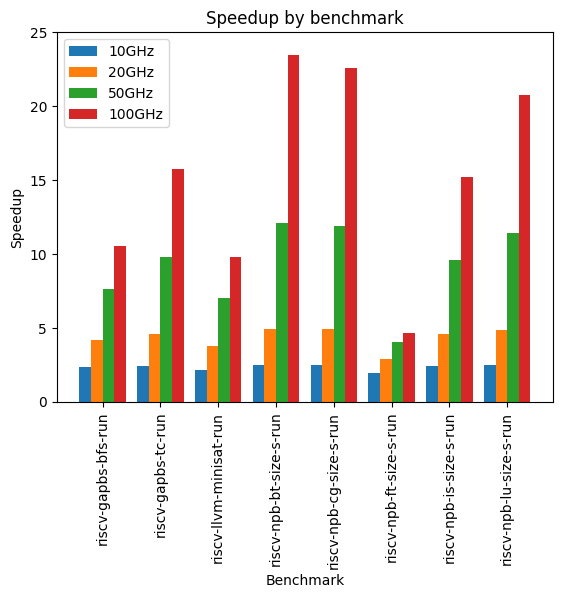

In [38]:
speedup()

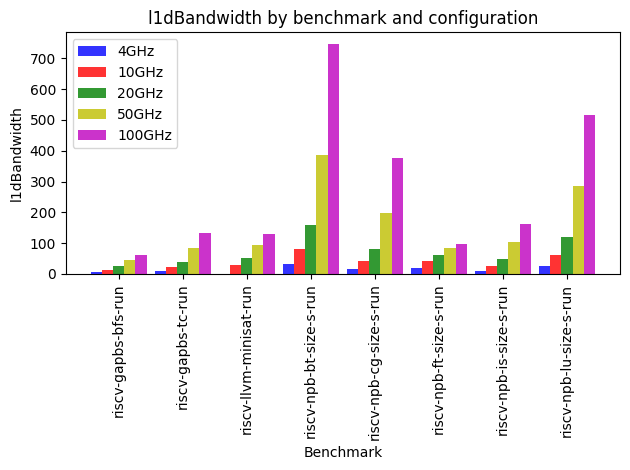

In [39]:
bandwidth('l1dBandwidth')

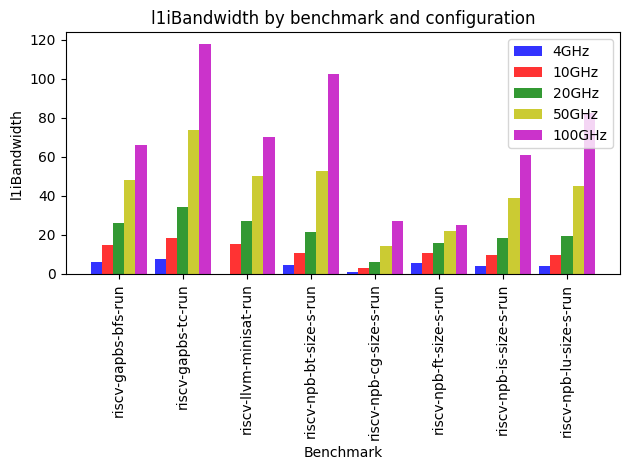

In [40]:
bandwidth('l1iBandwidth')

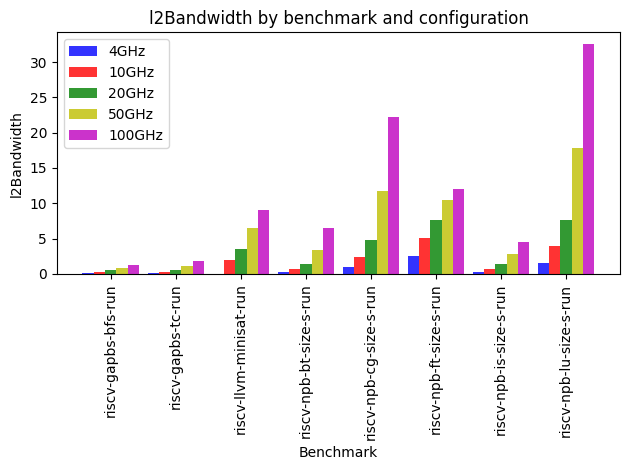

In [41]:
bandwidth('l2Bandwidth')

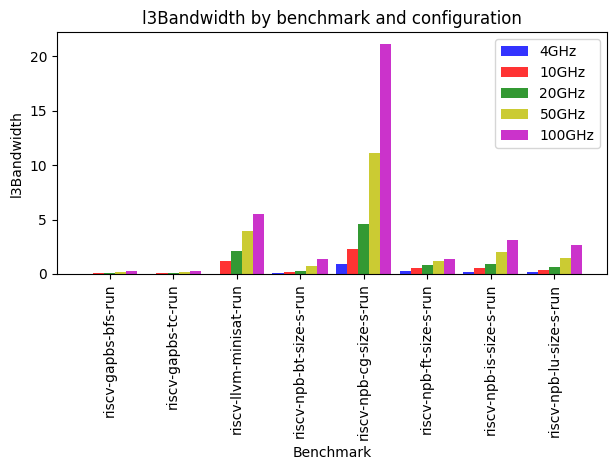

In [42]:
bandwidth('l3Bandwidth')

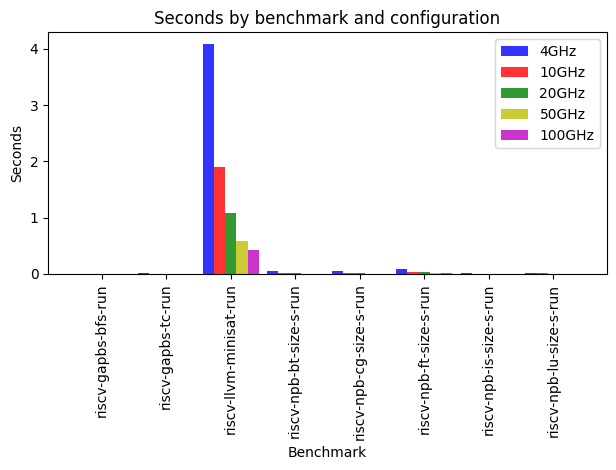

In [43]:
plot('Seconds')

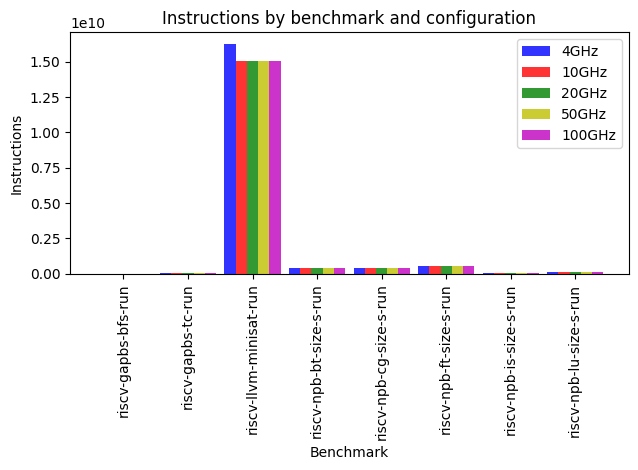

In [44]:
plot('Instructions')

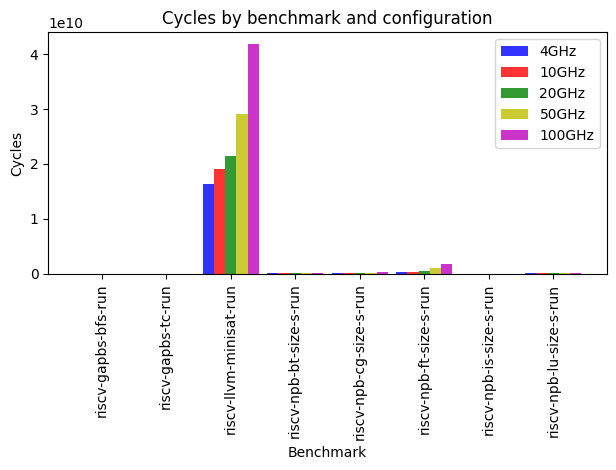

In [45]:
plot('Cycles')

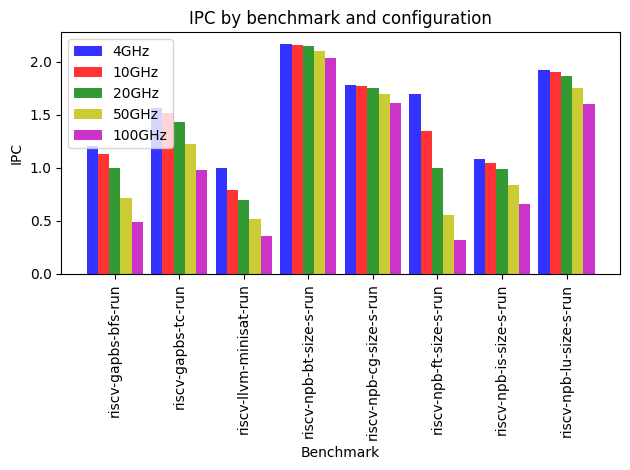

In [46]:
plot('IPC')